# Project 1: SAT & ACT Analysis

This project uses data from the past two years of SAT/ACT tests from all 50 states and the District of Columbia to analyze patterns and come to the conclusion that the best way for participation to increase is for the state in question to mandate that test, as it already has done in many states, and will continue to do so in many more in the coming years, if this single interval is any indication.


## Problem Statement

How does one effectively increase the participation rate of one of these two tests in any particular state?

## Executive Summary

If you want to, it's great to use relative links to direct your audience to various sections of a notebook. **HERE'S A DEMONSTRATION WITH THE CURRENT SECTION HEADERS**:

### Contents:
- [2017 Data Import & Cleaning](#Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

**If you combine your problem statement, executive summary, data dictionary, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.** Don't forget to cite your data sources!

*All libraries used should be added here*

In [1]:
#Imports:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 2017 Data Import and Cleaning

#### 1. Read In SAT & ACT  Data

Read in the `sat_2017.csv` and `act_2017.csv` files and assign them to appropriately named pandas dataframes.

In [2]:
#Code:

sat_2017 = pd.read_csv("C:/Users/NICK/Documents/General Assembly/Projects/project_1/data/sat_2017.csv")

act_2017 = pd.read_csv("C:/Users/NICK/Documents/General Assembly/Projects/project_1/data/act_2017.csv")

#### 2. Display Data

Print the first 10 rows of each dataframe to your jupyter notebook

In [3]:
act_2017.head()

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4


In [4]:
#converts participation to numbers
print(type(act_2017['Participation'][23]))

act_2017['Participation'] = pd.to_numeric(act_2017['Participation'].str.replace('%', ''))

print(type(act_2017["Participation"][23]))

<class 'str'>
<class 'numpy.int64'>


In [5]:
act_2017.describe()

,Participation,English,Math,Reading,Science,Composite
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,65.153846,20.919231,21.173077,22.001923,21.440385,21.509615
std,31.832518,2.332132,1.963602,2.048672,1.721406,2.002083
min,8.000000,16.300000,18.000000,18.100000,18.200000,17.800000
25%,31.000000,19.000000,19.400000,20.475000,19.975000,19.800000
50%,68.000000,20.550000,20.900000,21.700000,21.300000,21.400000
75%,100.000000,23.300000,23.100000,24.125000,23.125000,23.600000
max,100.000000,25.500000,25.300000,26.000000,24.900000,25.500000


In [6]:
#converts participation into int
print(type(sat_2017['Participation'][23]))

sat_2017['Participation'] = pd.to_numeric(sat_2017['Participation'].str.replace('%', ''))

print(type(sat_2017["Participation"][23]))

<class 'str'>
<class 'numpy.int64'>


In [7]:
#Makes the names nicer

sat_2017.rename(columns = {"Evidence-Based Reading and Writing": "Reading/Writing"}, inplace = True)
sat_2017.columns

Index(['State', 'Participation', 'Reading/Writing', 'Math', 'Total'], dtype='object')

In [8]:
#Code:
sat_2017.sample(10)

,State,Participation,Reading/Writing,Math,Total
33,North Carolina,49,546,535,1081
40,South Carolina,50,543,521,1064
34,North Dakota,2,635,621,1256
50,Wyoming,3,626,604,1230
44,Utah,3,624,614,1238
27,Nebraska,3,629,625,1253
43,Texas,62,513,507,1020
6,Connecticut,100,530,512,1041
0,Alabama,5,593,572,1165
23,Minnesota,3,644,651,1295


In [9]:
act_2017.head()

,State,Participation,English,Math,Reading,Science,Composite
0,National,60,20.3,20.7,21.4,21.0,21.0
1,Alabama,100,18.9,18.4,19.7,19.4,19.2
2,Alaska,65,18.7,19.8,20.4,19.9,19.8
3,Arizona,62,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100,18.9,19.0,19.7,19.5,19.4


In [10]:
act_2017.describe()

,Participation,English,Math,Reading,Science,Composite
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,65.153846,20.919231,21.173077,22.001923,21.440385,21.509615
std,31.832518,2.332132,1.963602,2.048672,1.721406,2.002083
min,8.000000,16.300000,18.000000,18.100000,18.200000,17.800000
25%,31.000000,19.000000,19.400000,20.475000,19.975000,19.800000
50%,68.000000,20.550000,20.900000,21.700000,21.300000,21.400000
75%,100.000000,23.300000,23.100000,24.125000,23.125000,23.600000
max,100.000000,25.500000,25.300000,26.000000,24.900000,25.500000


In [11]:
sat_2017.describe()

,Participation,Reading/Writing,Math,Total
count,51.000000,51.000000,51.000000,51.000000
mean,39.803922,569.117647,556.882353,1126.098039
std,35.276632,45.666901,47.121395,92.494812
min,2.000000,482.000000,468.000000,950.000000
25%,4.000000,533.500000,523.500000,1055.500000
50%,38.000000,559.000000,548.000000,1107.000000
75%,66.000000,613.000000,599.000000,1212.000000
max,100.000000,644.000000,651.000000,1295.000000


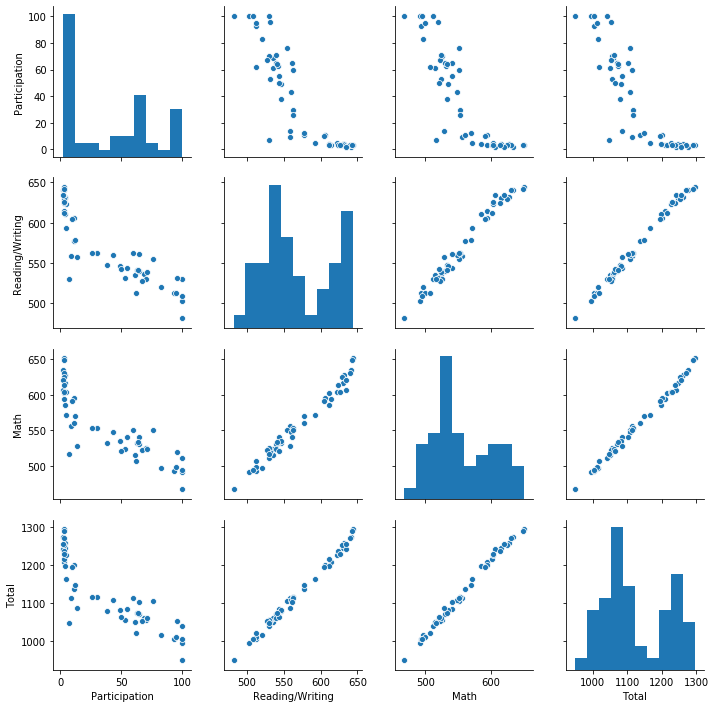

In [12]:
sns.pairplot(sat_2017)

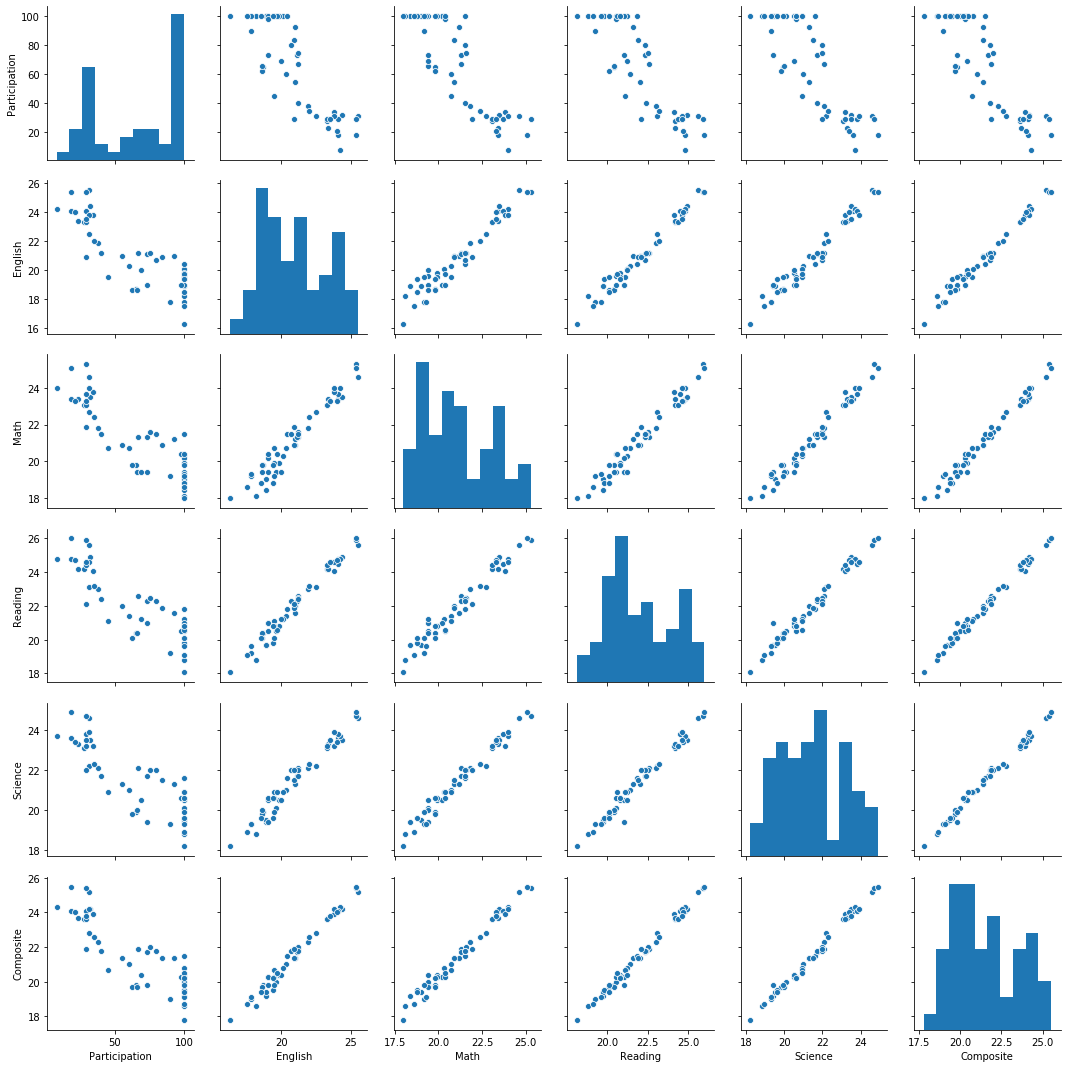

In [13]:
sns.pairplot(act_2017)

#### 3. Verbally Describe Data

Take your time looking through the data and thoroughly describe the data in the markdown cell below. 

Answer:
From the looks of it, more people take the ACT than SAT, as the participation mean is higher. 
There are some obvious trends to look at in the data. People with higher scores in one field tend to do better in the other fields as well, in both test. Additionally, the average score is much higher in states with lower participation scores.

#### 4a. Does the data look complete? 

Answer:
Looks complete, all states have scores and participation rates. A few of them seem a little low, though.

#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each test/subtest? What is the maximum *possible* value?**

Consider comparing any questionable values to the sources of your data:
- [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)

Answer: 
Had to update the csv files in a spreadsheet program about Maryland in both SAT and ACT. There was a dropped digit that I had to look up the proper documentation online to remedy, otherwise I would have gotten an improper outlier

#### 4c. Fix any errors you identified

**The data is available** so there's no need to guess or calculate anything. If you didn't find any errors, continue to the next step.

In [14]:
#code

#### 5. What are your data types? 
Display the data types of each feature. 

In [15]:
#code
print(sat_2017.dtypes)

State              object
Participation       int64
Reading/Writing     int64
Math                int64
Total               int64
dtype: object


In [16]:
print(act_2017.dtypes)

State             object
Participation      int64
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object


What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

Answer:
The participation score was a String, but I fixed it above

#### 6. Fix Incorrect Data Types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert participation rates to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [17]:
#code(not running it again because it will break things)

# act_2017['Participation'] = pd.to_numeric(act_2017['Participation'].str.replace('%', ''))

# sat_2017['Participation'] = pd.to_numeric(sat_2017['Participation'].str.replace('%', ''))

- Fix any individual values preventing other columns from being the appropriate type.

In [18]:
# It was just the participation

- Finish your data modifications by making sure the columns are now typed appropriately.

In [19]:
#code
sat_2017.dtypes

State              object
Participation       int64
Reading/Writing     int64
Math                int64
Total               int64
dtype: object

- Display the data types again to confirm they are correct.

In [20]:
#Code:
act_2017.dtypes

State             object
Participation      int64
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object

#### 7. Rename Columns
Change the names of the columns to more expressive names so that you can tell the difference the SAT columns and the ACT columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these data with some of the data from 2018, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).

In [21]:
sat_2017.head()

,State,Participation,Reading/Writing,Math,Total
0,Alabama,5,593,572,1165
1,Alaska,38,547,533,1080
2,Arizona,30,563,553,1116
3,Arkansas,3,614,594,1208
4,California,53,531,524,1055


In [22]:
act_2017.head()


,State,Participation,English,Math,Reading,Science,Composite
0,National,60,20.3,20.7,21.4,21.0,21.0
1,Alabama,100,18.9,18.4,19.7,19.4,19.2
2,Alaska,65,18.7,19.8,20.4,19.9,19.8
3,Arizona,62,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100,18.9,19.0,19.7,19.5,19.4


In [23]:
#code
columns_sat = ['state', 'sat_participation_17', 'sat_reading_writing_17', 'sat_math_17', 'sat_total_17']
columns_act = ['state', 'act_participation_17', 'act_english_17', 'act_math_17', 'act_reading_17', 'act_science_17', 'act_composite_17']

sat_2017.columns = columns_sat
act_2017.columns = columns_act

In [24]:
act_2017.head()

,state,act_participation_17,act_english_17,act_math_17,act_reading_17,act_science_17,act_composite_17
0,National,60,20.3,20.7,21.4,21.0,21.0
1,Alabama,100,18.9,18.4,19.7,19.4,19.2
2,Alaska,65,18.7,19.8,20.4,19.9,19.8
3,Arizona,62,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100,18.9,19.0,19.7,19.5,19.4


#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

|Feature|Type|Dataset|Description|
|---|---|---|---|
|state|object|all|The State the data is based upon|
|sat_participation_17|int|SAT 2017|Participation rate for SAT 2017|
|sat_participation_18|int|SAT 2018|Participation rate for SAT 2018|
|act_participation_17|int|ACT 2017|Participation rate for ACT 2017|
|act_participation_17|int|ACT 2018|Participation rate for ACT 2018|
|sat_total_17|int|SAT 2017|Total combined SAT score for 2017|
|sat_total_18|int|SAT 2018|Total combined SAT score for 2018|
|act_composite_17|float|ACT 2017|Total composite score for 2017|
|act_composite_18|float|ACT 2018|Total composite score for 2018|
|sat_reading_writing_17|int|SAT 2017|Reading/Writing score for 2017|
|sat_reading_writing_18|int|SAT 2018|Reading/Writing score for 2017|
|sat_math_17|int|SAT 2017|Math score for 2017|
|sat_math_18|int|SAT 2018|Math score for 2017|
|act_english_17|float|ACT 2017|English score for 2017|
|act_math_17|float|ACT 2017|Math score for 2017|
|act_reading_17|float|ACT 2017|Reading score for 2017|
|act_science_17|float|ACT 2017|Science score for 2017|

#### 9. Drop unnecessary rows

One of our dataframes contains an extra row. Identify and remove this from the dataframe.

In [25]:
#code
#It's the National row for the ACT
act_2017.drop(0).head()

,state,act_participation_17,act_english_17,act_math_17,act_reading_17,act_science_17,act_composite_17
1,Alabama,100,18.9,18.4,19.7,19.4,19.2
2,Alaska,65,18.7,19.8,20.4,19.9,19.8
3,Arizona,62,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100,18.9,19.0,19.7,19.5,19.4
5,California,31,22.5,22.7,23.1,22.2,22.8


#### 10. Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [26]:
#Code:

combined_2017 = sat_2017.merge(act_2017, on = 'state')

In [27]:
combined_2017.sample(5)

,state,sat_participation_17,sat_reading_writing_17,sat_math_17,sat_total_17,act_participation_17,act_english_17,act_math_17,act_reading_17,act_science_17,act_composite_17
21,Massachusetts,76,555,551,1107,29,25.4,25.3,25.9,24.7,25.4
19,Maine,95,513,499,1012,8,24.2,24.0,24.8,23.7,24.3
45,Vermont,60,562,551,1114,29,23.3,23.1,24.4,23.2,23.6
38,Pennsylvania,65,540,531,1071,23,23.4,23.4,24.2,23.3,23.7
4,California,53,531,524,1055,31,22.5,22.7,23.1,22.2,22.8


#### 11. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_2017.csv`.

In [28]:
#code
combined_2017.to_csv("../data/combined_2017.csv")

## 2018 Data Import and Cleaning

Links to the 2018 ACT and SAT data are provided in the README. These data live in PDFs, and so you'll get to enjoy practicing some *manual* data collection. Save these data as a CSV in your `data` directory, and import, explore, and clean these data in the same way you did above. **Make sure you comment on your steps so it is clear *why* you are doing each process**.

In [29]:
sat_2018 = pd.read_csv("../data/sat_2018.csv")

act_2018 = pd.read_csv('../data/act_2018.csv')

In [30]:
sat_2018.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,6%,595,571,1166
1,Alaska,43%,562,544,1106
2,Arizona,29%,577,572,1149
3,Arkansas,5%,592,576,1169
4,California,60%,540,536,1076


In [31]:
act_2018.head()

,State,Participation,Composite
0,Alabama,100%,19.1
1,Alaska,33%,20.8
2,Arizona,66%,19.2
3,Arkansas,100%,19.4
4,California,27%,22.7


In [32]:
act_2018['Participation'] = pd.to_numeric(act_2018['Participation'].str.replace('%', ''))

sat_2018['Participation'] = pd.to_numeric(sat_2018['Participation'].str.replace('%', ''))

In [33]:
act_2018.head()

,State,Participation,Composite
0,Alabama,100,19.1
1,Alaska,33,20.8
2,Arizona,66,19.2
3,Arkansas,100,19.4
4,California,27,22.7


In [34]:
sat_2018.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,6,595,571,1166
1,Alaska,43,562,544,1106
2,Arizona,29,577,572,1149
3,Arkansas,5,592,576,1169
4,California,60,540,536,1076


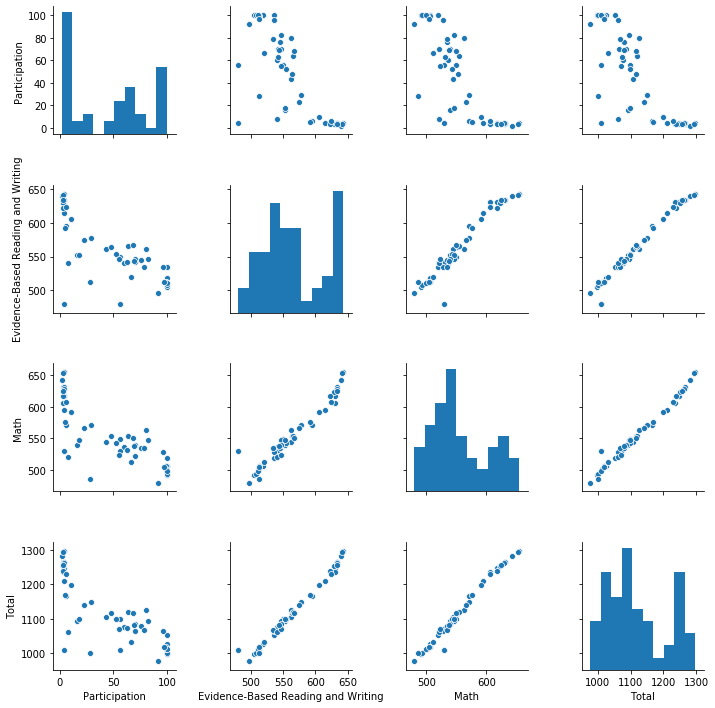

In [35]:
sns.pairplot(sat_2018)

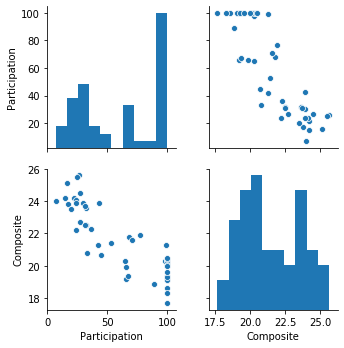

In [36]:
sns.pairplot(act_2018)

In [37]:
act_2018.dtypes

State             object
Participation      int64
Composite        float64
dtype: object

In [38]:
sat_titles_18 = ['state', 'sat_participation_18', 'sat_reading_writing_18', 'sat_math_18', 'sat_total_18']
act_titles_18 = ['state', 'act_participation_18', 'act_composite_18']

sat_2018.columns = sat_titles_18
act_2018.columns = act_titles_18
sat_2018.head()

,state,sat_participation_18,sat_reading_writing_18,sat_math_18,sat_total_18
0,Alabama,6,595,571,1166
1,Alaska,43,562,544,1106
2,Arizona,29,577,572,1149
3,Arkansas,5,592,576,1169
4,California,60,540,536,1076


#### Combine your 2017 and 2018 data into a single dataframe
Joining on state names should work, assuming you formatted all your state names identically. Make sure none of your columns (other than state) have identical names. Do yourself a favor and decide if you're encoding participation rates as floats or integers and standardize this across your datasets.

Save the contents of this merged dataframe as `final.csv`.

**Use this combined dataframe for the remainder of the project**.

In [39]:
combined_2017 = combined_2017.merge(sat_2018, on = 'state')

In [40]:
final = combined_2017.merge(act_2018, on = 'state')

In [41]:
final.head()

,state,sat_participation_17,sat_reading_writing_17,sat_math_17,sat_total_17,act_participation_17,act_english_17,act_math_17,act_reading_17,act_science_17,act_composite_17,sat_participation_18,sat_reading_writing_18,sat_math_18,sat_total_18,act_participation_18,act_composite_18
0,Alabama,5,593,572,1165,100,18.9,18.4,19.7,19.4,19.2,6,595,571,1166,100,19.1
1,Alaska,38,547,533,1080,65,18.7,19.8,20.4,19.9,19.8,43,562,544,1106,33,20.8
2,Arizona,30,563,553,1116,62,18.6,19.8,20.1,19.8,19.7,29,577,572,1149,66,19.2
3,Arkansas,3,614,594,1208,100,18.9,19.0,19.7,19.5,19.4,5,592,576,1169,100,19.4
4,California,53,531,524,1055,31,22.5,22.7,23.1,22.2,22.8,60,540,536,1076,27,22.7


In [42]:
final.to_csv("../data/final.csv")

In [43]:
final = pd.read_csv('../data/final.csv')

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [44]:
#Code:
final.drop(columns = ['Unnamed: 0'], inplace = True)
final.describe().T

,count,mean,std,min,25%,50%,75%,max
sat_participation_17,51.0,39.803922,35.276632,2.0,4.00,38.0,66.00,100.0
sat_reading_writing_17,51.0,569.117647,45.666901,482.0,533.50,559.0,613.00,644.0
sat_math_17,51.0,556.882353,47.121395,468.0,523.50,548.0,599.00,651.0
sat_total_17,51.0,1126.098039,92.494812,950.0,1055.50,1107.0,1212.00,1295.0
act_participation_17,51.0,65.254902,32.140842,8.0,31.00,69.0,100.00,100.0
act_english_17,51.0,20.931373,2.353677,16.3,19.00,20.7,23.30,25.5
act_math_17,51.0,21.182353,1.981989,18.0,19.40,20.9,23.10,25.3
act_reading_17,51.0,22.013725,2.067271,18.1,20.45,21.8,24.15,26.0
act_science_17,51.0,21.449020,1.737397,18.2,19.95,21.3,23.15,24.9
act_composite_17,51.0,21.519608,2.020695,17.8,19.80,21.4,23.60,25.5


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [45]:
math_mean = final['act_math_17'].mean()
thing = ((final['act_math_17'] - math_mean) ** 2).sum()
thing

196.41411764705884

In [46]:
#code
def my_std(df, col):
    mu = df[col].mean() 
    n = len(df[col])
    under_sum = ((df[col] - mu) ** 2).sum()
    sigma = np.sqrt(under_sum/n)
    return sigma
    

In [47]:
print(final['sat_participation_17'].std())
print(my_std(final, 'sat_participation_17'))
print(np.std(final['sat_participation_17']))

35.276632270013046
34.929070766645076
34.92907076664508


- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`

In [48]:
sn = {col: np.std(final[col]) for col in final.columns if col != 'state'}
sn #Using Numpy's standard deviation model

{'sat_participation_17': 34.92907076664508,
 'sat_reading_writing_17': 45.21697020437866,
 'sat_math_17': 46.65713364485503,
 'sat_total_17': 91.58351056778743,
 'act_participation_17': 31.824175751231806,
 'act_english_17': 2.3304876369363363,
 'act_math_17': 1.9624620273436781,
 'act_reading_17': 2.0469029314842646,
 'act_science_17': 1.7202795656314875,
 'act_composite_17': 2.000786081581989,
 'sat_participation_18': 36.946619223539415,
 'sat_reading_writing_18': 47.03460978357609,
 'sat_math_18': 47.30194550378352,
 'sat_total_18': 93.22742384464433,
 'act_participation_18': 33.70173582041031,
 'act_composite_18': 2.090779082141178}

In [49]:
#Code:
sd = {col:np.round(my_std(final, col),3) for col in final.columns if col != 'state'}
sd #Using my standard deviation model

{'sat_participation_17': 34.929,
 'sat_reading_writing_17': 45.217,
 'sat_math_17': 46.657,
 'sat_total_17': 91.584,
 'act_participation_17': 31.824,
 'act_english_17': 2.33,
 'act_math_17': 1.962,
 'act_reading_17': 2.047,
 'act_science_17': 1.72,
 'act_composite_17': 2.001,
 'sat_participation_18': 36.947,
 'sat_reading_writing_18': 47.035,
 'sat_math_18': 47.302,
 'sat_total_18': 93.227,
 'act_participation_18': 33.702,
 'act_composite_18': 2.091}

In [50]:
final.describe().T['std']
#using pandas' standard deviation model

sat_participation_17      35.276632
sat_reading_writing_17    45.666901
sat_math_17               47.121395
sat_total_17              92.494812
act_participation_17      32.140842
act_english_17             2.353677
act_math_17                1.981989
act_reading_17             2.067271
act_science_17             1.737397
act_composite_17           2.020695
sat_participation_18      37.314256
sat_reading_writing_18    47.502627
sat_math_18               47.772623
sat_total_18              94.155083
act_participation_18      34.037085
act_composite_18           2.111583
Name: std, dtype: float64

Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?



Right, so numpy uses the same formula as shown, so it matches up perfectly with my function. However, pandas formula puts everything over **n-1**, not **n**, because that is the formula to use for sample sizes rather than population(apparently)


#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Do any states with 100% participation on a given test have a rate change year-to-year?
- Do any states show have >50% participation on *both* tests either year?

Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [51]:
#code
final.sort_values('sat_participation_17', ascending = False).head()
final_reduced = final[['state',
                       'sat_participation_17', 
                       'sat_total_17', 
                       'act_participation_17', 
                       'act_composite_17',
                       'sat_participation_18', 
                       'sat_total_18', 
                       'act_participation_18', 
                       'act_composite_18']]
final_reduced.head()

,state,sat_participation_17,sat_total_17,act_participation_17,act_composite_17,sat_participation_18,sat_total_18,act_participation_18,act_composite_18
0,Alabama,5,1165,100,19.2,6,1166,100,19.1
1,Alaska,38,1080,65,19.8,43,1106,33,20.8
2,Arizona,30,1116,62,19.7,29,1149,66,19.2
3,Arkansas,3,1208,100,19.4,5,1169,100,19.4
4,California,53,1055,31,22.8,60,1076,27,22.7


In [52]:
final_reduced.sort_values('sat_participation_17', ascending = False).head()

,state,sat_participation_17,sat_total_17,act_participation_17,act_composite_17,sat_participation_18,sat_total_18,act_participation_18,act_composite_18
8,District of Columbia,100,950,32,24.2,92,977,32,23.6
22,Michigan,100,1005,29,24.1,100,1011,22,24.2
6,Connecticut,100,1041,31,25.2,100,1053,26,25.6
7,Delaware,100,996,18,24.1,100,998,17,23.8
29,New Hampshire,96,1052,18,25.5,96,1063,16,25.1


In [53]:
final_reduced.sort_values('sat_participation_17', ascending = False).tail()

,state,sat_participation_17,sat_total_17,act_participation_17,act_composite_17,sat_participation_18,sat_total_18,act_participation_18,act_composite_18
3,Arkansas,3,1208,100,19.4,5,1169,100,19.4
50,Wyoming,3,1230,100,20.2,3,1257,100,20.0
34,North Dakota,2,1256,98,20.3,2,1283,98,20.3
24,Mississippi,2,1242,100,18.6,3,1236,100,18.6
15,Iowa,2,1275,67,21.9,3,1265,68,21.8


For the SAT 2017, the highest participation rates are in a four way tie between DC, Michigan, Connecticut, and Delaware at 100% of students. 
The lowest rates are in a three way tie between North Dakota, Mississippi, and Iowa, at a resounding 2%. 

In [54]:
final_reduced.sort_values('act_participation_17', ascending = False).head(18)

,state,sat_participation_17,sat_total_17,act_participation_17,act_composite_17,sat_participation_18,sat_total_18,act_participation_18,act_composite_18
0,Alabama,5,1165,100,19.2,6,1166,100,19.1
17,Kentucky,4,1247,100,20.0,4,1248,100,20.2
49,Wisconsin,3,1291,100,20.5,3,1294,100,20.5
44,Utah,3,1238,100,20.3,4,1010,100,20.4
42,Tennessee,5,1228,100,19.8,6,1231,100,19.6
40,South Carolina,50,1064,100,18.7,55,1070,100,18.3
36,Oklahoma,7,1047,100,19.4,8,1062,100,19.3
33,North Carolina,49,1081,100,19.1,52,1098,100,19.1
28,Nevada,26,1116,100,17.8,23,1140,100,17.7
26,Montana,10,1196,100,20.3,10,1198,100,20.0


In [55]:
final_reduced.sort_values('act_participation_17', ascending = False).tail()

,state,sat_participation_17,sat_total_17,act_participation_17,act_composite_17,sat_participation_18,sat_total_18,act_participation_18,act_composite_18
38,Pennsylvania,65,1071,23,23.7,70,1086,20,23.5
39,Rhode Island,71,1062,21,24.0,97,1018,15,24.2
7,Delaware,100,996,18,24.1,100,998,17,23.8
29,New Hampshire,96,1052,18,25.5,96,1063,16,25.1
19,Maine,95,1012,8,24.3,99,1013,7,24.0


For the ACT 2017, there were many states tied for the highest participation: namely Alabama, Kentucky, Wisconsin, Utah, Tennessee, South Caroline, Oklahoma, North Carolina, Nevada, Montana, Mississippi, Minnesota, Louisiana, Missouri, Wyoming, Colorado, and Arkansas.

For the low end, only one state can claim such a high honor: Maine. 

In [56]:
final_reduced.sort_values('act_participation_18', ascending = False).head(19)

,state,sat_participation_17,sat_total_17,act_participation_17,act_composite_17,sat_participation_18,sat_total_18,act_participation_18,act_composite_18
0,Alabama,5,1165,100,19.2,6,1166,100,19.1
17,Kentucky,4,1247,100,20.0,4,1248,100,20.2
49,Wisconsin,3,1291,100,20.5,3,1294,100,20.5
44,Utah,3,1238,100,20.3,4,1010,100,20.4
42,Tennessee,5,1228,100,19.8,6,1231,100,19.6
40,South Carolina,50,1064,100,18.7,55,1070,100,18.3
36,Oklahoma,7,1047,100,19.4,8,1062,100,19.3
35,Ohio,12,1149,75,22.0,18,1099,100,20.3
33,North Carolina,49,1081,100,19.1,52,1098,100,19.1
28,Nevada,26,1116,100,17.8,23,1140,100,17.7


In [57]:
final_reduced.sort_values('act_participation_18', ascending = False).tail()

,state,sat_participation_17,sat_total_17,act_participation_17,act_composite_17,sat_participation_18,sat_total_18,act_participation_18,act_composite_18
38,Pennsylvania,65,1071,23,23.7,70,1086,20,23.5
7,Delaware,100,996,18,24.1,100,998,17,23.8
29,New Hampshire,96,1052,18,25.5,96,1063,16,25.1
39,Rhode Island,71,1062,21,24.0,97,1018,15,24.2
19,Maine,95,1012,8,24.3,99,1013,7,24.0


for the ACT in 2018, many states had 100% participation. Those states are Alabama, Kentucky, Wisconsin, Utah, Tennessee, South Carolina, Oklahoma, Ohio, North Carolina, Nevada, Nebraska, Montana, Mississippi, Louisiana, Missouri, Wyoming, and Arkansas

The low end is still just Maine. Thanks, Maine.

In [58]:
final_reduced.sort_values('sat_participation_18', ascending = False).head(10)

,state,sat_participation_17,sat_total_17,act_participation_17,act_composite_17,sat_participation_18,sat_total_18,act_participation_18,act_composite_18
5,Colorado,11,1201,100,20.8,100,1025,30,23.9
6,Connecticut,100,1041,31,25.2,100,1053,26,25.6
7,Delaware,100,996,18,24.1,100,998,17,23.8
22,Michigan,100,1005,29,24.1,100,1011,22,24.2
12,Idaho,93,1005,38,22.3,100,1001,36,22.3
19,Maine,95,1012,8,24.3,99,1013,7,24.0
13,Illinois,9,1115,93,21.4,99,1019,43,23.9
39,Rhode Island,71,1062,21,24.0,97,1018,15,24.2
29,New Hampshire,96,1052,18,25.5,96,1063,16,25.1
8,District of Columbia,100,950,32,24.2,92,977,32,23.6


In [59]:
final_reduced.sort_values('sat_participation_18', ascending = False).tail()

,state,sat_participation_17,sat_total_17,act_participation_17,act_composite_17,sat_participation_18,sat_total_18,act_participation_18,act_composite_18
24,Mississippi,2,1242,100,18.6,3,1236,100,18.6
15,Iowa,2,1275,67,21.9,3,1265,68,21.8
49,Wisconsin,3,1291,100,20.5,3,1294,100,20.5
50,Wyoming,3,1230,100,20.2,3,1257,100,20.0
34,North Dakota,2,1256,98,20.3,2,1283,98,20.3


For the SAT 2018, five states could, claim 100% participation: Colorado, Connecticut, Delaware, Michigan, and Idaho

Do any states with 100% participation on a given test have a rate change year-to-year?

In [60]:
final_reduced[(final_reduced['sat_participation_17'] > 50) & (final_reduced['act_participation_17'] > 50)]

,state,sat_participation_17,sat_total_17,act_participation_17,act_composite_17,sat_participation_18,sat_total_18,act_participation_18,act_composite_18
9,Florida,83,1017,73,19.8,56,1099,66,19.9
10,Georgia,61,1050,55,21.4,70,1064,53,21.4
11,Hawaii,55,1085,90,19.0,56,1010,89,18.9


In [61]:
final_reduced[(final_reduced['sat_participation_18'] > 50) & (final_reduced['act_participation_18'] > 50)]

,state,sat_participation_17,sat_total_17,act_participation_17,act_composite_17,sat_participation_18,sat_total_18,act_participation_18,act_composite_18
9,Florida,83,1017,73,19.8,56,1099,66,19.9
10,Georgia,61,1050,55,21.4,70,1064,53,21.4
11,Hawaii,55,1085,90,19.0,56,1010,89,18.9
33,North Carolina,49,1081,100,19.1,52,1098,100,19.1
40,South Carolina,50,1064,100,18.7,55,1070,100,18.3


Three states have consistently had high participation in both tests, Florida, Georgia, and Hawaii. For the case of North and South Carolina, the ACT participation was already at 100%, but the SAT participation bumped up over 50% for the first time in 2018

## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

In [62]:
final.corr()

,sat_participation_17,sat_reading_writing_17,sat_math_17,sat_total_17,act_participation_17,act_english_17,act_math_17,act_reading_17,act_science_17,act_composite_17,sat_participation_18,sat_reading_writing_18,sat_math_18,sat_total_18,act_participation_18,act_composite_18
sat_participation_17,1.000000,-0.874326,-0.855091,-0.867540,-0.841234,0.686889,0.710697,0.705352,0.653453,0.694748,0.874763,-0.666313,-0.686941,-0.684556,-0.791925,0.644778
sat_reading_writing_17,-0.874326,1.000000,0.987056,0.996661,0.716153,-0.461345,-0.486126,-0.488441,-0.421770,-0.470382,-0.818925,0.814096,0.865909,0.849798,0.700499,-0.446705
sat_math_17,-0.855091,0.987056,1.000000,0.996822,0.682572,-0.420673,-0.420456,-0.442410,-0.365123,-0.417817,-0.789166,0.800380,0.878982,0.849583,0.665817,-0.394132
sat_total_17,-0.867540,0.996661,0.996822,1.000000,0.701477,-0.441947,-0.454116,-0.466558,-0.394181,-0.445020,-0.806796,0.810068,0.875601,0.852727,0.685297,-0.421317
act_participation_17,-0.841234,0.716153,0.682572,0.701477,1.000000,-0.843501,-0.861114,-0.866620,-0.836203,-0.858134,-0.756479,0.522593,0.555406,0.545179,0.918875,-0.780381
act_english_17,0.686889,-0.461345,-0.420673,-0.441947,-0.843501,1.000000,0.967803,0.985999,0.979986,0.990856,0.679643,-0.347978,-0.365787,-0.361303,-0.799093,0.934716
act_math_17,0.710697,-0.486126,-0.420456,-0.454116,-0.861114,0.967803,1.000000,0.979630,0.986926,0.990451,0.696294,-0.355133,-0.340094,-0.351847,-0.815031,0.934624
act_reading_17,0.705352,-0.488441,-0.442410,-0.466558,-0.866620,0.985999,0.979630,1.000000,0.987929,0.995069,0.680380,-0.363354,-0.374075,-0.373195,-0.815108,0.932338
act_science_17,0.653453,-0.421770,-0.365123,-0.394181,-0.836203,0.979986,0.986926,0.987929,1.000000,0.995064,0.647431,-0.319957,-0.315274,-0.321552,-0.786599,0.936908
act_composite_17,0.694748,-0.470382,-0.417817,-0.445020,-0.858134,0.990856,0.990451,0.995069,0.995064,1.000000,0.683164,-0.351602,-0.354639,-0.357463,-0.810493,0.941365


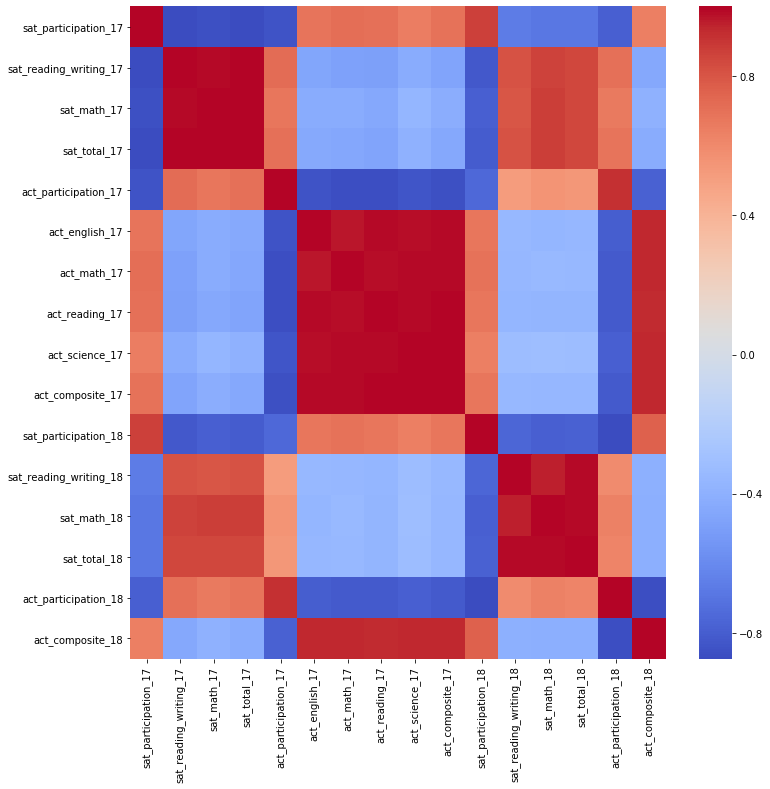

In [63]:
plt.figure(figsize = (12,12))
sns.heatmap(final.corr(), cmap = 'coolwarm')

#### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [64]:

def subplot_histograms(dataframe, list_of_columns, list_of_titles, supertitle):
    
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows          
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize = (12,12)) # You'll want to specify your figsize
    fig.suptitle(supertitle, size = 24)            
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
                
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column]) # feel free to add more settings     
        ax[i].set_title(list_of_titles[i]) 
        # Set titles, labels, etc here for each subplot

#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

In [65]:
final.columns

Index(['state', 'sat_participation_17', 'sat_reading_writing_17',
       'sat_math_17', 'sat_total_17', 'act_participation_17', 'act_english_17',
       'act_math_17', 'act_reading_17', 'act_science_17', 'act_composite_17',
       'sat_participation_18', 'sat_reading_writing_18', 'sat_math_18',
       'sat_total_18', 'act_participation_18', 'act_composite_18'],
      dtype='object')

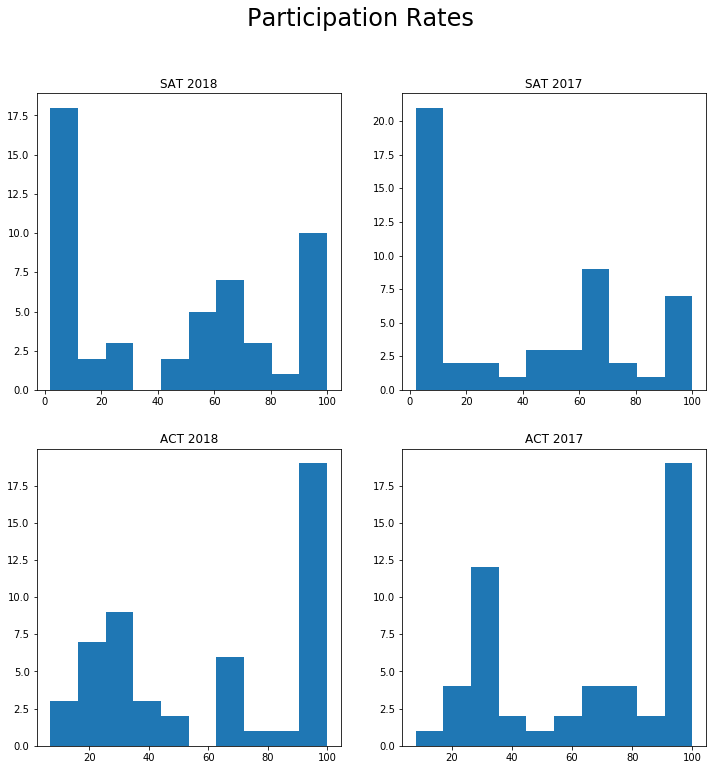

In [66]:
# Participation rates for SAT & ACT
subplot_histograms(final, ['sat_participation_18', 'sat_participation_17', 
                           'act_participation_18', 'act_participation_17'], 
                           ["SAT 2018", "SAT 2017", 'ACT 2018', 'ACT 2017'],
                              "Participation Rates")

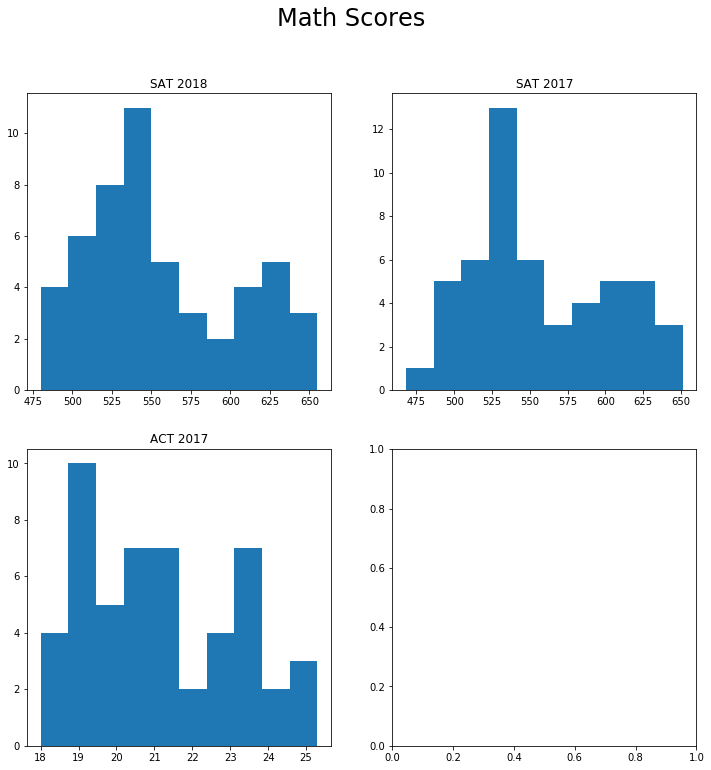

In [67]:
#Math scores for SAT & ACT
subplot_histograms(final, ['sat_math_18', 'sat_math_17', 'act_math_17'], 
                           ["SAT 2018", "SAT 2017", 'ACT 2017'],
                              "Math Scores")

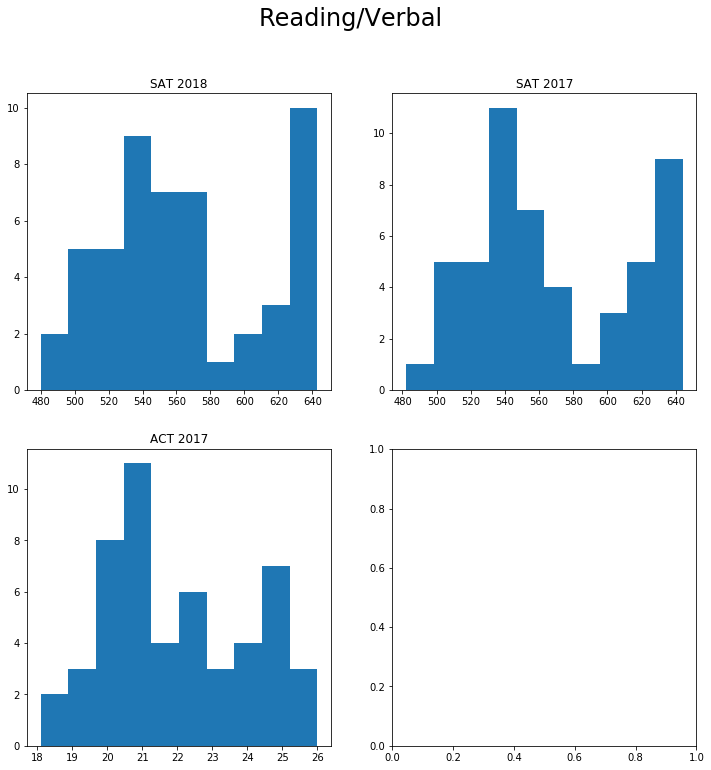

In [68]:
#Reading/verbal scores for SAT & ACT
subplot_histograms(final, ['sat_reading_writing_18', 'sat_reading_writing_17', 
                           'act_reading_17'], 
                           ["SAT 2018", "SAT 2017", 'ACT 2017']
                              ,"Reading/Verbal")

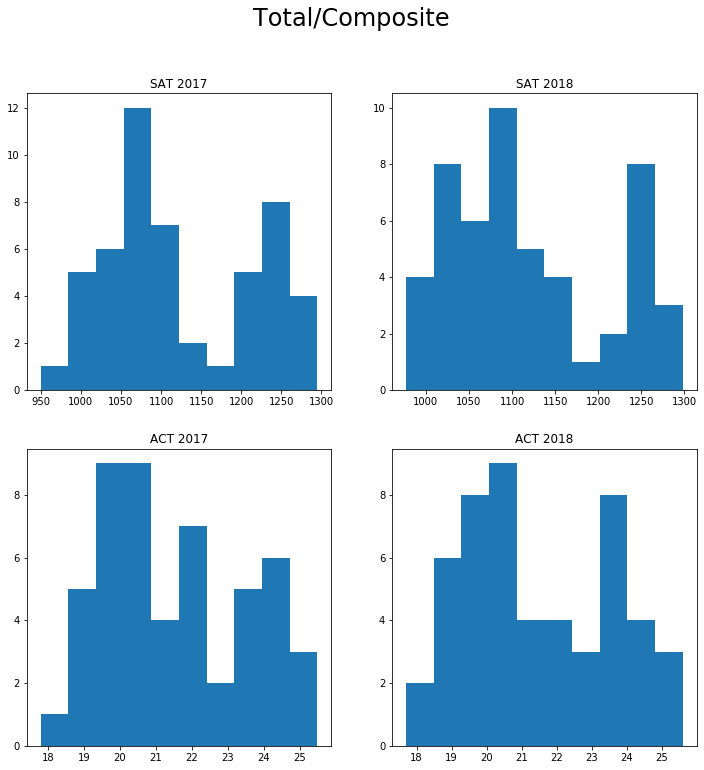

In [69]:
subplot_histograms(final, ['sat_total_17', 'sat_total_18', 
                           'act_composite_17', 'act_composite_18'], 
                           ["SAT 2017", "SAT 2018", 'ACT 2017', 'ACT 2018']
                              ,"Total/Composite")

Histogram: Participation rates are heavily skewed left for SAT, right for ACT

#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


In [70]:
17# Code
def subplot_scatter(dataframe, list_of_columns, list_of_titles, supertitle):
    
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows          
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize = (12,12)) # You'll want to specify your figsize
    fig.suptitle(supertitle, size = 24)            
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
                
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].scatter(dataframe[column[0]], dataframe[column[1]]) # feel free to add more settings     
        ax[i].set_title(list_of_titles[i]) 
        # Set titles, labels, etc here for each subplot

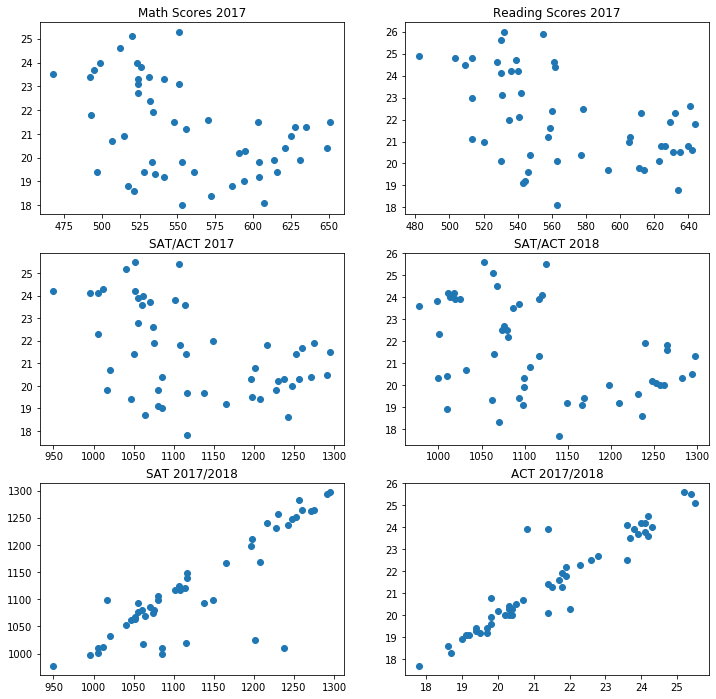

In [137]:
cols =  [['sat_math_17', 'act_math_17'],
         ['sat_reading_writing_17', 'act_reading_17'],
         ['sat_total_17', 'act_composite_17'], 
         ['sat_total_18', 'act_composite_18'],
         ['sat_total_17', 'sat_total_18'], 
         ['act_composite_17', 'act_composite_18']]
subplot_scatter(final, cols, 
                        ['Math Scores 2017', 'Reading Scores 2017', 'SAT/ACT 2017', 
                         'SAT/ACT 2018', 'SAT 2017/2018', 'ACT 2017/2018'], 
                        '')

Scatter Plots:

Pretty solid line between the totals of the respective tests. For the comparisons between the tests, it's a little vague but from what I'm seeing, the high scoring SAT states have a comparatively low ACT score, and vica versa. In the middle it doesn't matter as much, but on the fringes there is a loose correlation there. Especially damning is the fact that there is not a single data point in the top right quadrant, of having high scores in both. That says something. 

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

In [72]:
final.columns

Index(['state', 'sat_participation_17', 'sat_reading_writing_17',
       'sat_math_17', 'sat_total_17', 'act_participation_17', 'act_english_17',
       'act_math_17', 'act_reading_17', 'act_science_17', 'act_composite_17',
       'sat_participation_18', 'sat_reading_writing_18', 'sat_math_18',
       'sat_total_18', 'act_participation_18', 'act_composite_18'],
      dtype='object')

In [73]:
# Code
participation_sat = ['sat_participation_17', 'sat_participation_18']
participation_act = ['act_participation_17', 'act_participation_18']
reading_english = ['sat_reading_writing_17', 'sat_reading_writing_18']
sat_total = ['sat_total_17', 'sat_total_18']
act_total = ['act_composite_17', 'act_composite_18']
math = ['sat_math_17', 'sat_math_18']
science = 'act_science_17'
final_list = [participation_sat, participation_act, reading_english, science, math, sat_total, act_total]


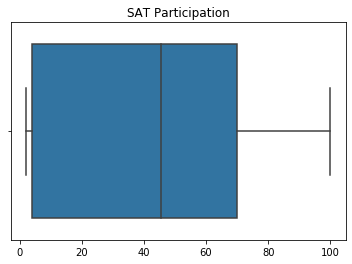

In [74]:
sns.boxplot(final[participation_sat])
plt.title("SAT Participation");

Text(0.5, 1.0, 'ACT Participation')

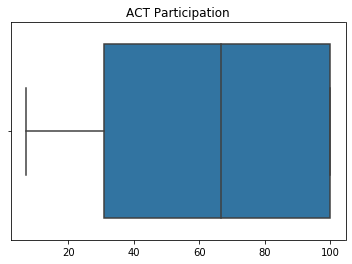

In [75]:
sns.boxplot(final[participation_act])
plt.title('ACT Participation')

Text(0.5, 1.0, 'Combined Reading/English')

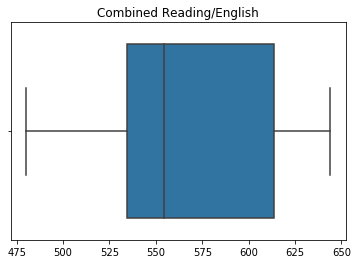

In [76]:
sns.boxplot(final[reading_english])
plt.title('Combined Reading/English')

Text(0.5, 1.0, 'SAT Totals')

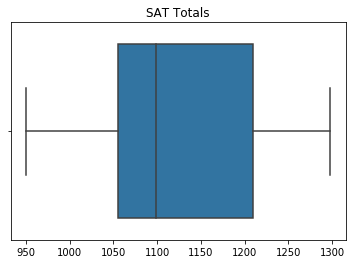

In [77]:
sns.boxplot(final[sat_total])
plt.title('SAT Totals')

Text(0.5, 1.0, 'ACT Composites')

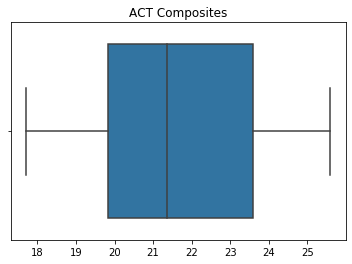

In [78]:
sns.boxplot(final[act_total])
plt.title('ACT Composites')

Text(0.5, 1.0, 'Combined Math')

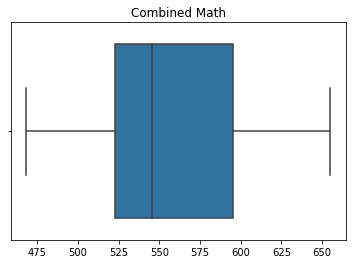

In [79]:
sns.boxplot(final[math])
plt.title('Combined Math')

Text(0.5, 1.0, 'Science')

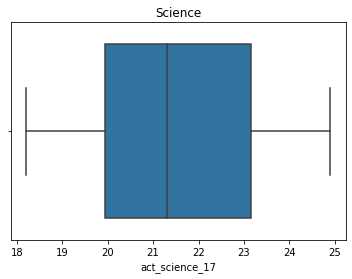

In [80]:
sns.boxplot(final[science])
plt.title('Science')

Box Plots: 
Basically, I don't like box plots. The information they are trying to convey is the interquartile range, the min and max, and the median. But some of these boxes are so large and unwieldy it is hard to get reliable information from them. What I can say is that in general, the participations of the ACT for the states are a lot higher than the SAT


#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

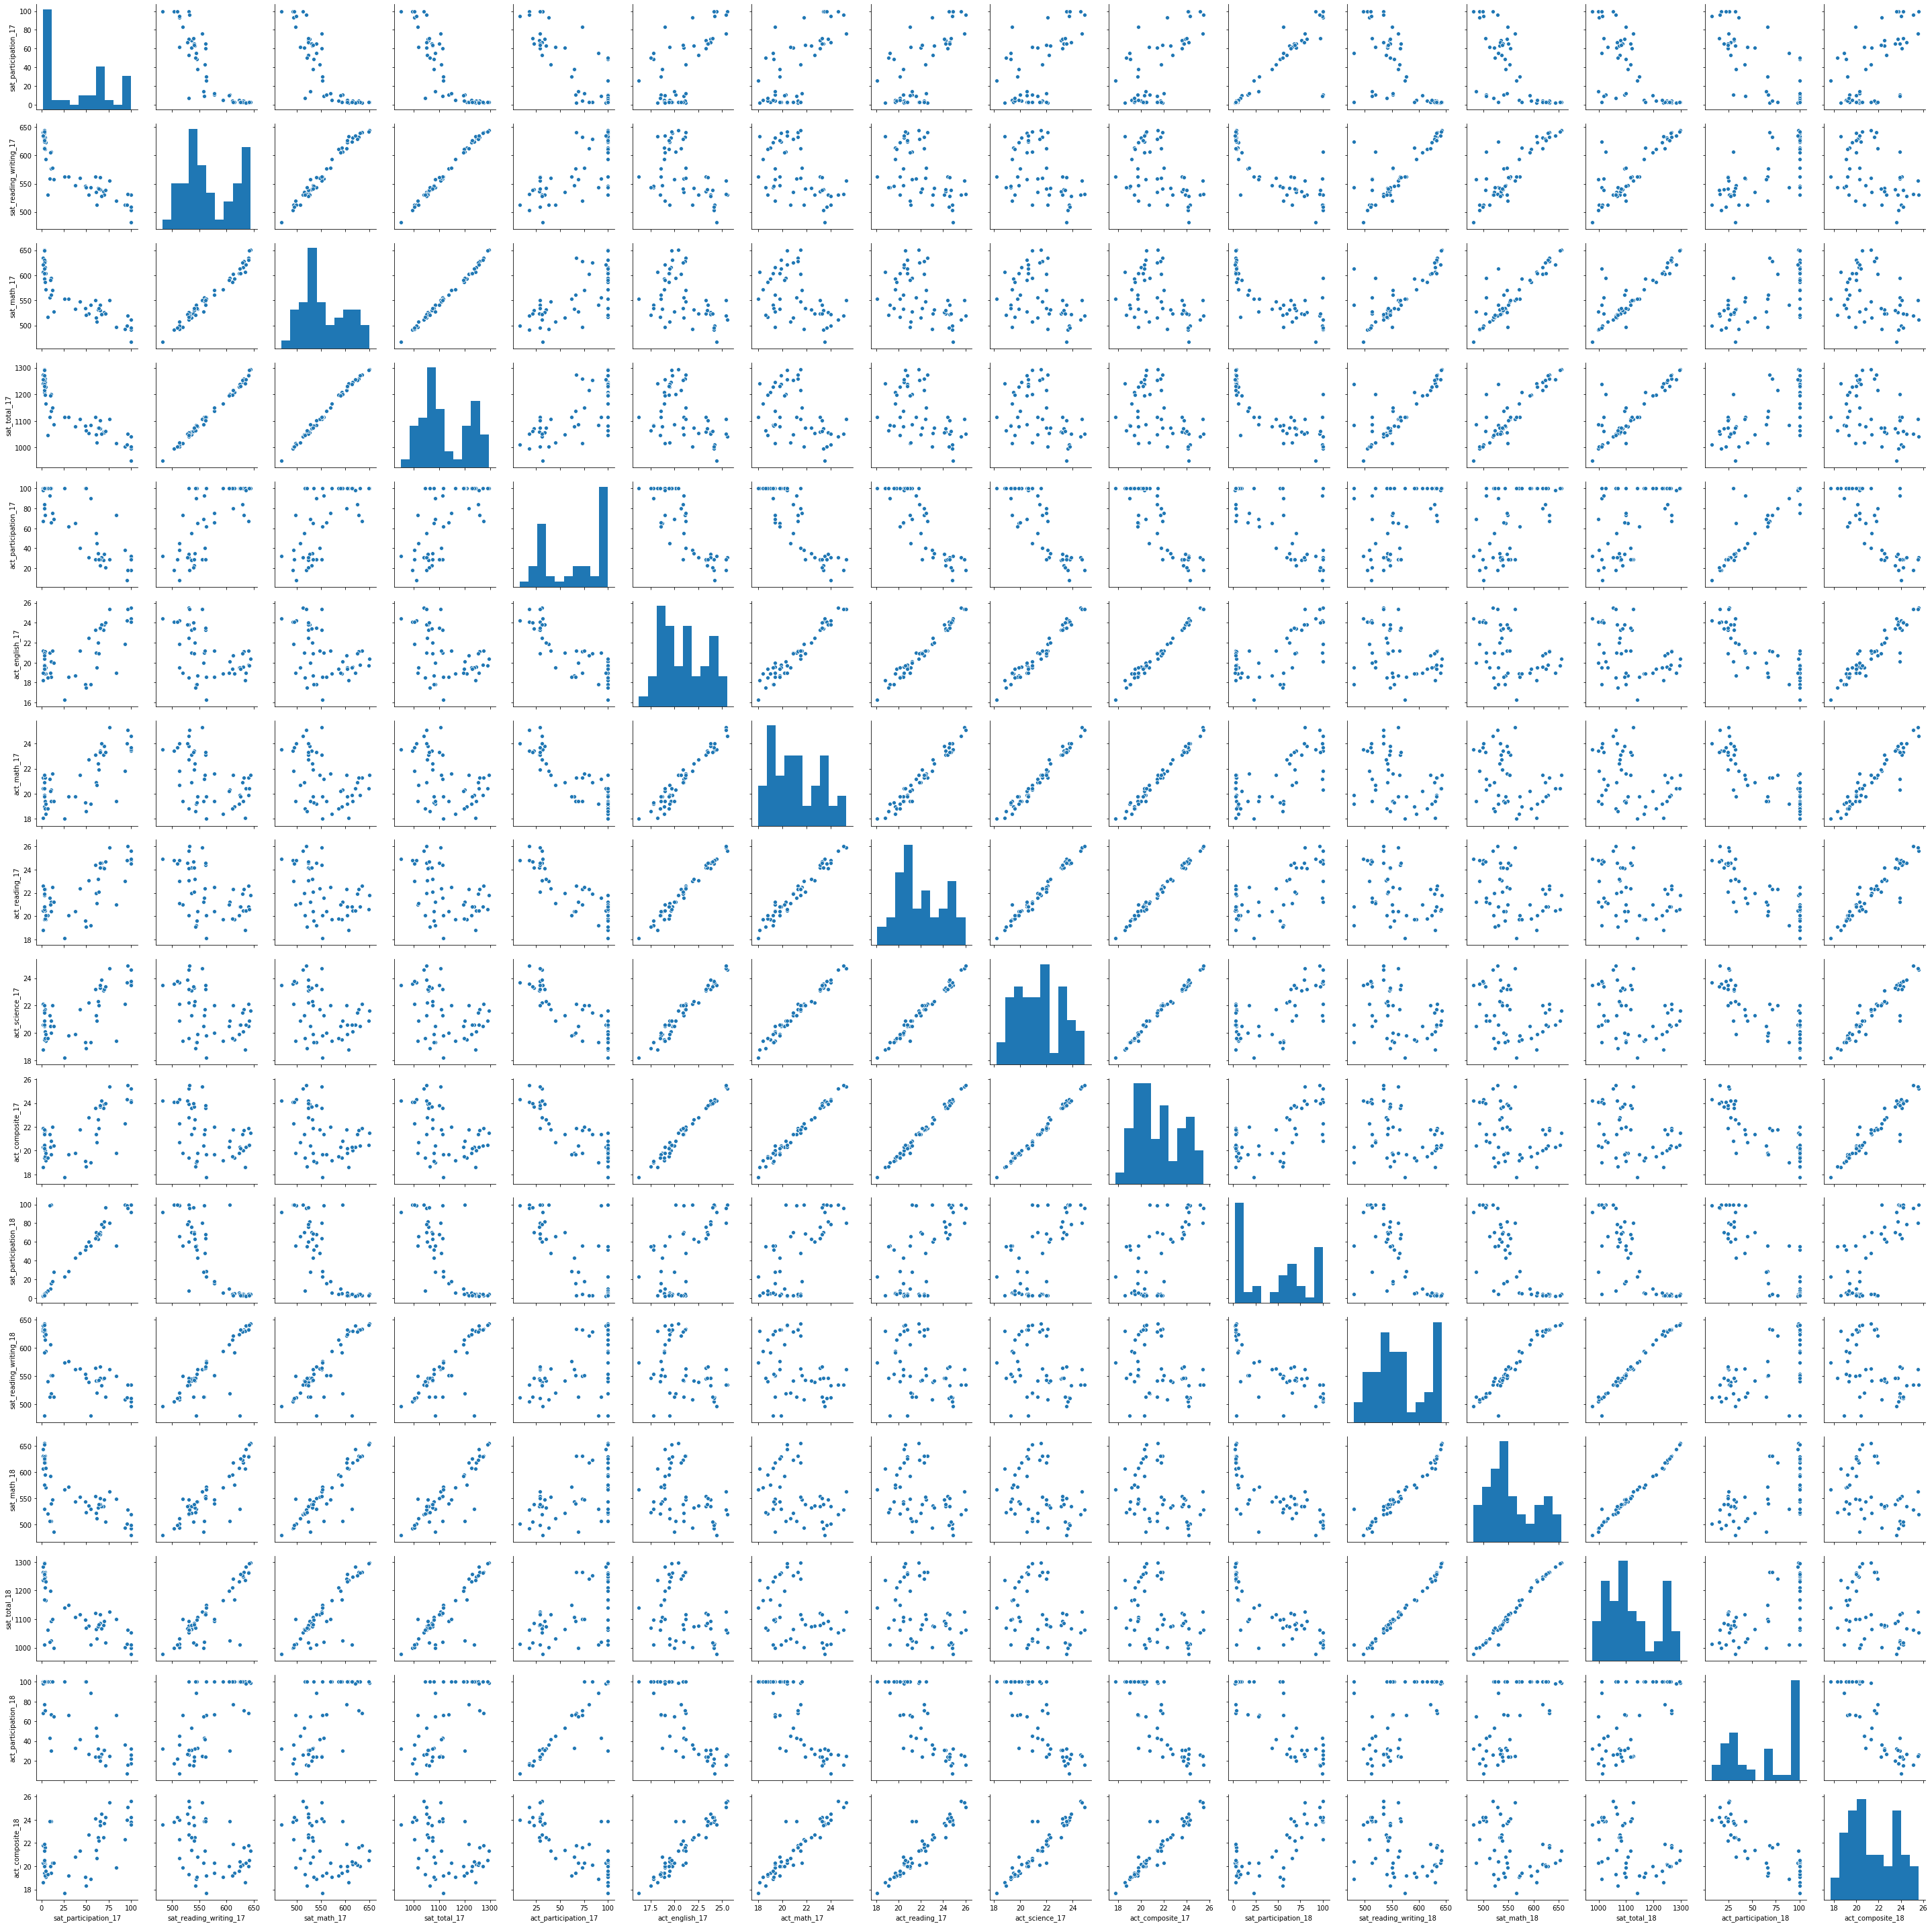

In [81]:
sns.pairplot(final)

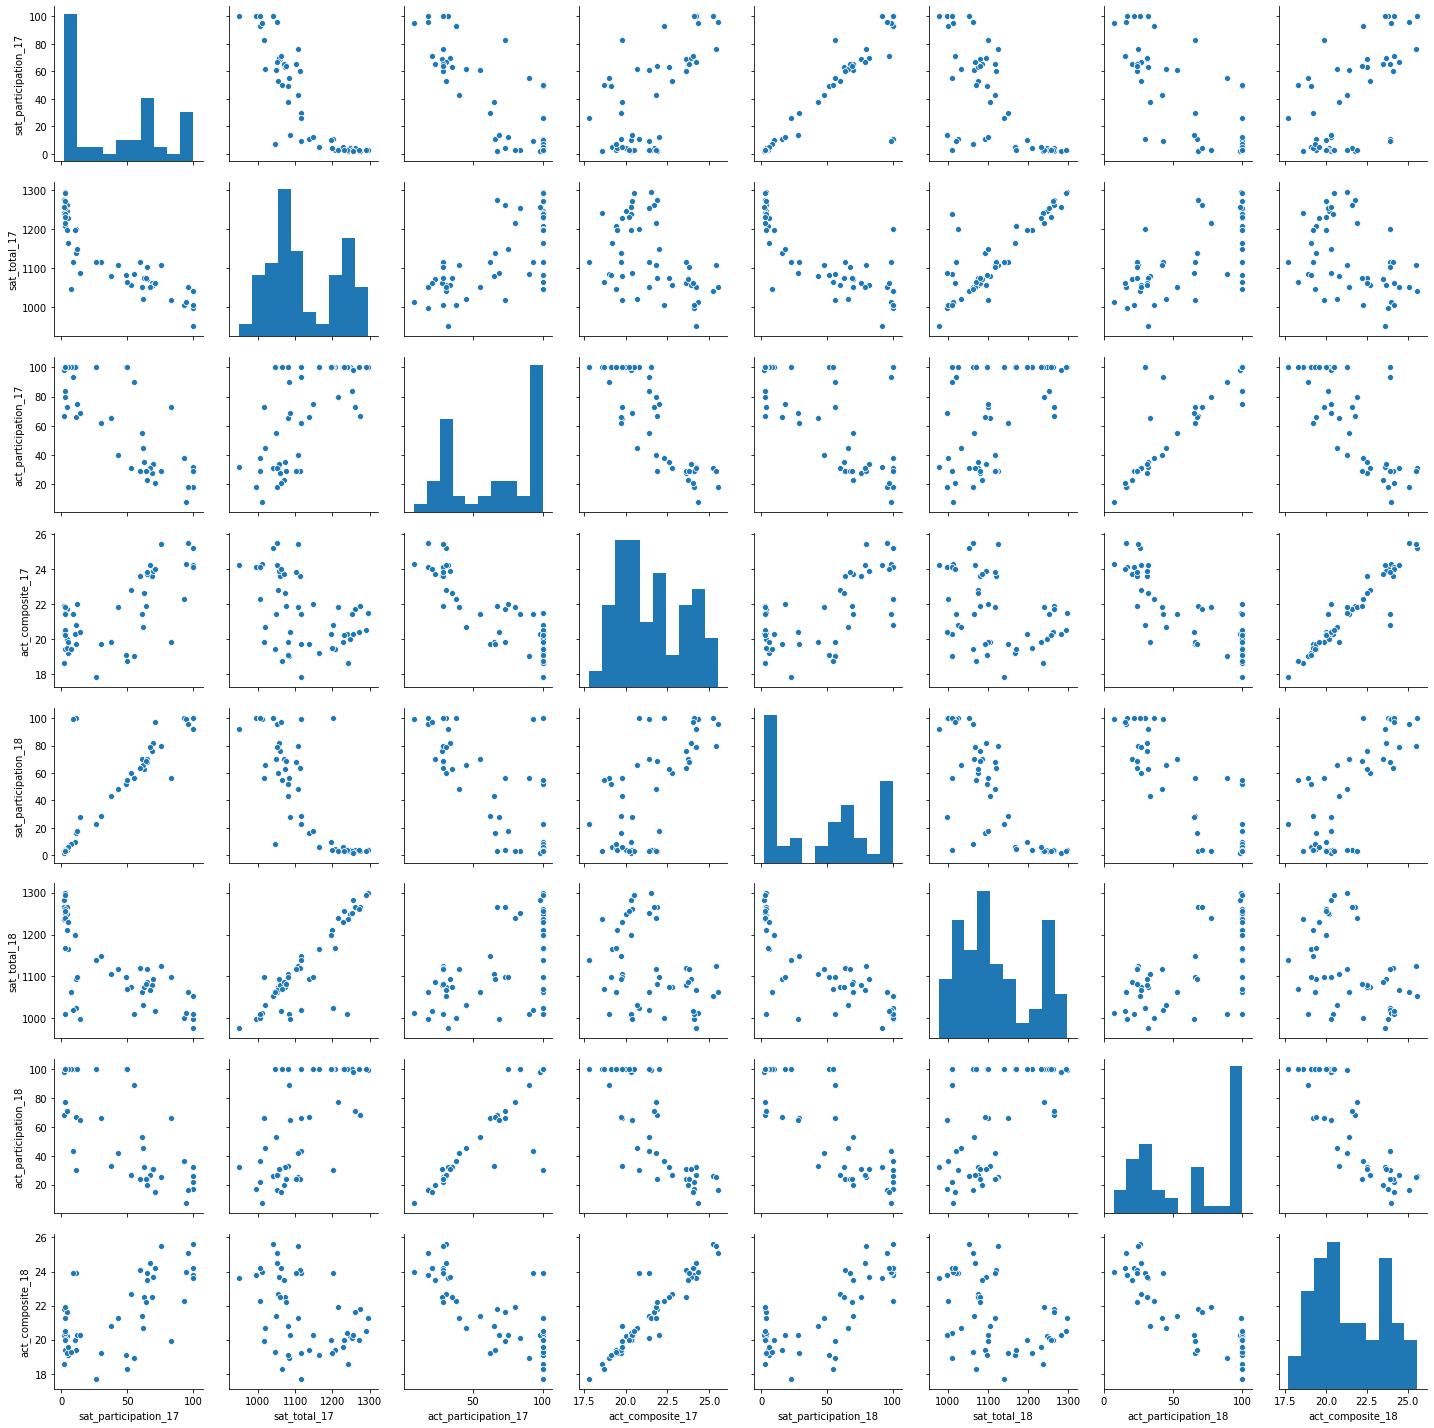

In [82]:
sns.pairplot(final_reduced)

One of the biggest thing I see here and I've seen in other areas of my workbook, the higher the participation in both tests, the lower the score. That is likely because the people in those states who do participate are those who are better-prepared for it, and score higher. Whereas in states where the test is mandatory, the spread is more naturally all over the place, and will trend the mean downward. 

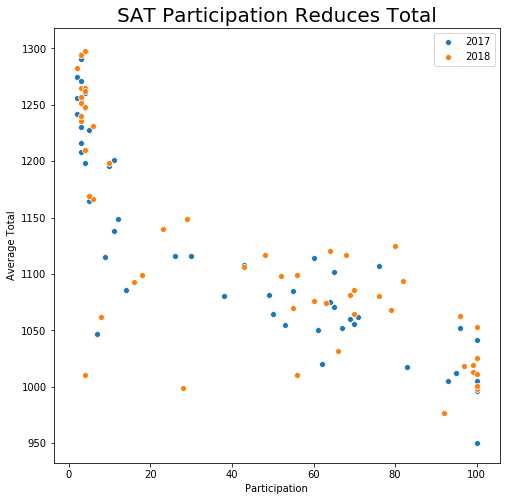

In [136]:
plt.figure(figsize = (8,8))
sns.scatterplot(final['sat_participation_17'], final['sat_total_17'])
sns.scatterplot(final['sat_participation_18'], final['sat_total_18'])
plt.legend(["2017", "2018"])
plt.title("SAT Participation Reduces Total", size = 20)
plt.xlabel("Participation")
plt.ylabel("Average Total");

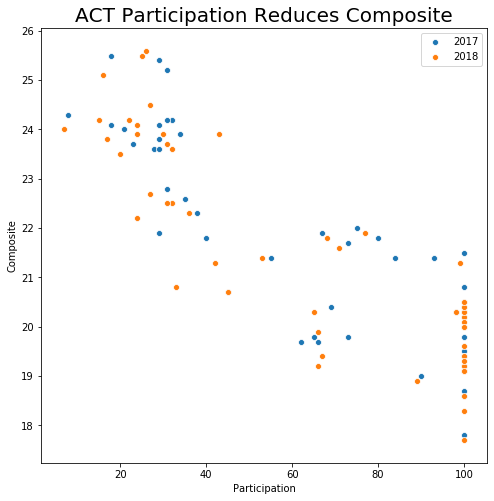

In [133]:
plt.figure(figsize = (8,8))
sns.scatterplot(final['act_participation_17'], final['act_composite_17'])
sns.scatterplot(final['act_participation_18'], final['act_composite_18'])
plt.legend(["2017", "2018"])
plt.xlabel("Participation")
plt.ylabel("Composite")
plt.title("ACT Participation Reduces Composite", size = 20);

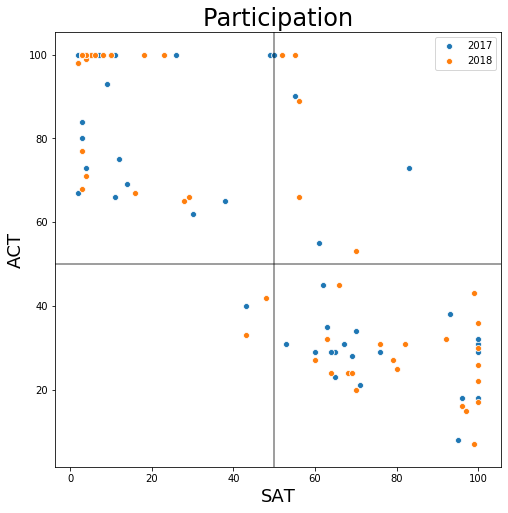

In [130]:
plt.figure(figsize = (8,8))
sns.scatterplot(final['sat_participation_17'], final['act_participation_17'])
sns.scatterplot(final['sat_participation_18'], final['act_participation_18'])

plt.title("Participation", size = 24)
plt.legend(["2017", '2018'])
plt.axvline(50, alpha = 0.5, color = 'black')
plt.axhline(50, alpha = 0.5, color = 'black')
plt.xlabel("SAT", size = 18)
plt.ylabel("ACT", size = 18);

These double scatter plots are really drilling down that states with lower participation scores have higher averages

## Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

In [85]:
final.describe().T

,count,mean,std,min,25%,50%,75%,max
sat_participation_17,51.0,39.803922,35.276632,2.0,4.00,38.0,66.00,100.0
sat_reading_writing_17,51.0,569.117647,45.666901,482.0,533.50,559.0,613.00,644.0
sat_math_17,51.0,556.882353,47.121395,468.0,523.50,548.0,599.00,651.0
sat_total_17,51.0,1126.098039,92.494812,950.0,1055.50,1107.0,1212.00,1295.0
act_participation_17,51.0,65.254902,32.140842,8.0,31.00,69.0,100.00,100.0
act_english_17,51.0,20.931373,2.353677,16.3,19.00,20.7,23.30,25.5
act_math_17,51.0,21.182353,1.981989,18.0,19.40,20.9,23.10,25.3
act_reading_17,51.0,22.013725,2.067271,18.1,20.45,21.8,24.15,26.0
act_science_17,51.0,21.449020,1.737397,18.2,19.95,21.3,23.15,24.9
act_composite_17,51.0,21.519608,2.020695,17.8,19.80,21.4,23.60,25.5


Answers:

From the looks of it, the data is pretty centrally located, with the participations tending to skew one way or the other. The scores themselves look fine.

#### We generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?

Answer: generally, no. The data seems to be skewed left in most places, not in the center and not symmetrical like a normal curve should be. Additionally, this population is not quite enough for a true normal curve to form, so even if the greater population is normally distributed, this sample of averages is not

Does This Assumption Hold for:
    - Math
    - Reading
    - Rates
Explain your answers for each distribution and how you think this will affect estimates made from these data.

Answer:

Math: Yes, it is skewed left and has a rather high peak.

Reading: Yes, it is skewed left and also has a high peak

Participation Rates: yes, it is heavily skewed to the sides, SAT to the left, ACT to the right

#### Estimate Limits of Data

Suppose we only seek to understand the relationship between SAT and ACT participation rates in 2017. 

##### Does it make sense to conduct statistical inference given these data specifically? 

Why or why not?

*(think about granularity, aggregation, the relationships between populations size & rates...consider the actually populations these data describe in answering this question)*

Answer:
It would. There is enough data to perform statistical inference on it and the underlying numbers behind the averages are enough to adequately speak upon how the entire population behaves based upon it

##### Is it appropriate to compare *these* specific SAT and ACT math scores? 

Why or why not?

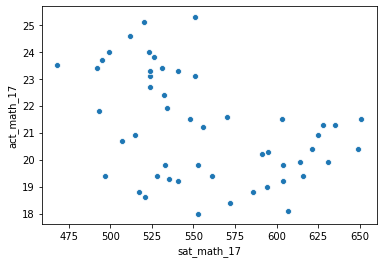

In [180]:

sns.scatterplot(final['sat_math_17'], final['act_math_17']);

Answer: No, as they are on a completely different scale. Additionally, as you can see, the same behavior is happening there that has happened elsewhere, where the states with higher scores in one have lower scores on the other. Bad comparisons.

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

In [87]:
# Code:

## Outside Research

Based upon your observations, choose **three** states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

In [127]:
final_reduced[(final_reduced['state'] == "Colorado") | (final['state'] == "Nebraska") | (final['state'] == "Illinois")].T

,5,13,27
state,Colorado,Illinois,Nebraska
sat_participation_17,11,9,3
sat_total_17,1201,1115,1253
act_participation_17,100,93,84
act_composite_17,20.8,21.4,21.4
sat_participation_18,100,99,3
sat_total_18,1025,1019,1252
act_participation_18,30,43,100
act_composite_18,23.9,23.9,20.1


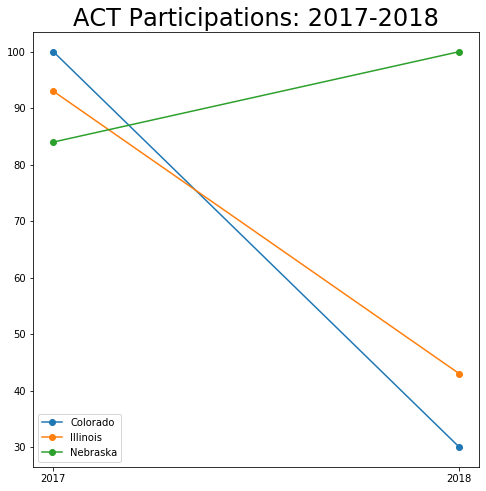

In [179]:
points_x = [[2017, 2018], [2017, 2018], [2017, 2018]]
points_y = [[100,30],[93,43],[84,100]]
plt.figure(figsize = (8,8))
plt.plot(points_x[0], points_y[0], label = "Colorado", marker = 'o')
plt.plot(points_x[1], points_y[1],label = "Illinois", marker = 'o')
plt.plot(points_x[2], points_y[2], label = "Nebraska", marker = 'o')
plt.legend()
plt.xticks([2017,2018])
plt.title("ACT Participations: 2017-2018", size = 24);

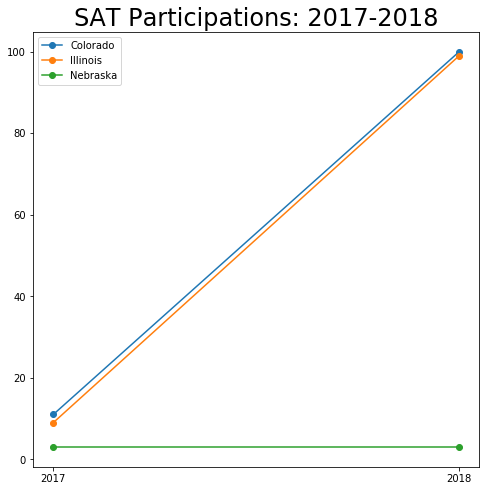

In [178]:

points_x = [[2017, 2018], [2017, 2018], [2017, 2018]]
points_y = [[11,100],[9,99],[3,3]]
plt.figure(figsize = (8,8))
plt.plot(points_x[0], points_y[0], label = "Colorado", marker = 'o')
plt.plot(points_x[1], points_y[1],label = "Illinois", marker = 'o')
plt.plot(points_x[2], points_y[2], label = "Nebraska", marker = 'o')
plt.legend()
plt.xticks([2017,2018])
plt.title("SAT Participations: 2017-2018", size = 24);

The first thing that immediately pops out to me is the state of Illinois. From 2017 to 2018, participation jumped drastically from 9 percent all the way up to 99 percent. Looking online, I found that the state of Illinois had made the SAT mandatory for all juniors in 2017, which only revealed itself in the 2018 data. See source(https://www.testive.com/illinois/)

From what I can see, states usually choose to adopt either the SAT or the ACT, at the expense of the other. In this case, Illinois changed from a 9% SAT and 93% ACT participation to 99% and 43%, respectively. 

Colorado has a very similar result, going from 11% SAT and 100% ACT to 100% and 30% just a year later. This is another policy that was mandated on the state level(https://www.testive.com/colorado-sat-change-2017/). As one goes up, the other becomes less relevant, because it seems that students would rather not take two tests when they could just take one

Nebraska has a similar phenomenon, but in the reverse. The SAT participation rates remained the same, at a very low 3%, but the ACT participation went from 84 to 100 percent, implying another state level change(https://www.education.ne.gov/assessment/act/)

## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Choose one state with a lower participation rate and provide a suggestion for how the College Board might increase participation amongst graduating seniors in this state. Are there additional data you desire that would better inform your investigations?

There are two large takeaways from this information. Firstly, if the College Board would like to see greater participation, go to the states and ask very nicely. So nicely, that the state mandates the use of that test to every high school junior. Secondly, pick one test, and stick with it. The second follows closely from the first, but when one test is propped up by a state government, the other falls by the wayside. Money talks faster and easier than anything else I can think of, so go get lobbying!